In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import csv

data = []
labels = []

test_data = []
test_labels = []

count=0

with open('sample_train.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        if int(row[0]) == 1 or int(row[0]) == 2:
            count+=1
            data.append(row[1:])
            labels.append(int(row[0]))
            
data = np.matrix(data).astype(np.float64)
labels = np.array(labels).astype(np.float64)

# data_mean = np.mean(data,axis=0)
# data_cov_inv = np.linalg.inv(np.cov(data))

# data = np.matmul(data_cov_inv,data-data_mean)

print(data.shape)

with open('sample_test.csv','r') as f:
    rows = csv.reader(f)
    for row in rows:
        if int(row[0]) == 1 or int(row[0]) == 2:
            test_data.append(row[1:])
            test_labels.append(int(row[0]))
        
test_data = np.matrix(test_data).astype(np.float64)

(1200, 784)


In [26]:
svm = SVC(C=0.001,kernel='linear')
svm.fit(data,labels)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svm.predict(test_data)

accuracy=0
for i in range(len(y_pred)):
    if(y_pred[i]==test_labels[i]):
        accuracy += 1
confusion_matrix(test_labels, y_pred)
print(accuracy/len(test_labels)*100)

98.0


In [24]:
values,vectors = np.linalg.eig(np.cov(data.T))
temp = vectors[:,:2]
red_data = np.matmul(data,temp).real

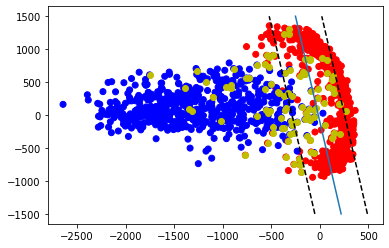

In [35]:
colors=[]

alphas = np.matmul(svm.support_vectors_,temp)

for i in range(len(labels)):
    if(labels[i]==1):
        colors.append('r')
    else:
        colors.append('b')

plt.scatter(np.array(red_data[:,0]),np.array(red_data[:,1]),c=colors)
plt.scatter(np.array(alphas[:,0]),np.array(alphas[:,1]),c='y')

w = svm.coef_[0]
w = np.matmul(w,temp)
ylim = (-1500,1500)
b = -w[1] / w[0]
yy = np.linspace(ylim[0], ylim[1])
xx = b * yy - svm.intercept_[0] / w[0]
plt.plot(xx, yy)
xx = b * yy - (svm.intercept_[0] + 1) / w[0]
plt.plot(xx, yy, 'k--')
xx = b * yy - (svm.intercept_[0] - 1) / w[0]
plt.plot(xx, yy, 'k--')
# xx = a * xx - (svm.intercept_[0] - 1) / w[1]
# plt.plot(xx, yy, 'k--')
# xx = a * xx - (svm.intercept_[0] + 1) / w[1]
# plt.plot(xx, yy, 'k--')